In [1]:
#This is a menpo project for the paper "Face Recognition Using Eigenfaces"
%matplotlib inline
import os
import menpo.io as mio
from menpowidgets import visualize_images
import numpy as np

workingspace = os.getcwd()



trainingdata = workingspace + '/train/'
testdata = workingspace + '/test/'


print ( trainingdata )


/Users/Lee/Desktop/Menpo_Playground_With_Mynotes/menpo_playground/notebooks/EigenFaces/train/


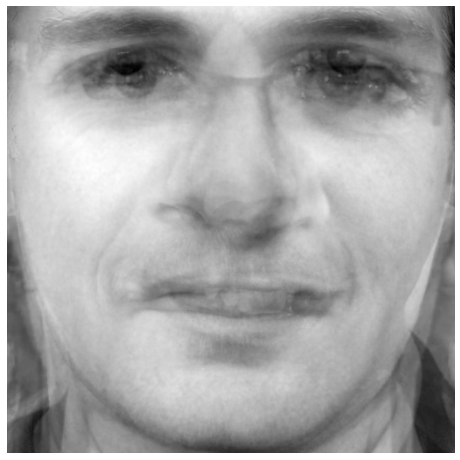

In [2]:
from menpowidgets import visualize_images as vimgs
from menpo.transform import scale_about_centre
import numpy as np 
from menpo.image import Image


def find_landmark(asset):
    # print( asset )
    index = str(asset).rfind('/') + 1
    maskdir + str(asset)[ index: -4 ]
    return { "MyAAM": os.path.abspath( maskdir + '/' + str(asset)[ index: -4 ] + '.pts' ) }

trainingset = Image.init_blank( [ 512, 512 ] )
TV = trainingset.as_vector()
imgVs = []
dictionary = {}
for fname in os.listdir(trainingdata):
    if( fname.endswith( '.jpg' ) ):
        #print( fname )
        img = mio.import_image( trainingdata + fname  )
        if img.n_channels == 3:
            img = img.as_greyscale()
        #print(img.landmarks.has_landmarks)
        img = img.crop_to_landmarks().resize([512,512])
           
        imgV = img.as_vector()
        dictionary[ img ] = imgV 
        #imgVs.append( imgV )
        TV = TV + imgV
                
meanV = TV / 10

  
        
meanFace = trainingset.from_vector( meanV )
meanFace.view()      


In [3]:
import menpo.math.decomposition as mmath
A = np.empty((512*512,10))

columni = 0
for key in dictionary:
    dictionary[ key ] = dictionary[ key ] - meanV
    A[ :, columni ] = dictionary[ key ]
    columni += 1
    

C = np.dot(A.transpose(), A) / 9

#print( C )

eigVector, eigValue = mmath.eigenvalue_decomposition( C )


U_k = np.dot( A, eigVector )

for key in dictionary:
    W_k = np.dot( U_k.transpose(), dictionary[ key ] )
    dictionary[ key ] = W_k

result = []
for fname in os.listdir(testdata):
    if( fname.endswith( '.jpg' ) ):
        img = mio.import_image( testdata + fname  )
        if img.n_channels == 3:
            img = img.as_greyscale().resize([512,512])
        #img = img.crop_to_landmarks().resize([512,512])
        imgV = img.as_vector()
        imgV = imgV - meanV
        obama = np.dot( U_k.transpose(), imgV )
        #print( obama )
        for key in dictionary:
            dist = np.linalg.norm( obama - dictionary[ key ] )
            print( dist, key )
            if( dist < 7000):
                result.append(key)
            

   
            
visualize_images(result)   

    


    

26472.9547303 512W x 512H 2D Image with 1 channel
12812.4873488 512W x 512H 2D Image with 1 channel
25390.0825146 512W x 512H 2D Image with 1 channel
7811.61631901 512W x 512H 2D Image with 1 channel
10518.5242134 512W x 512H 2D Image with 1 channel
10681.7592831 512W x 512H 2D Image with 1 channel
25263.6038118 512W x 512H 2D Image with 1 channel
19087.2000443 512W x 512H 2D Image with 1 channel
31383.0498615 512W x 512H 2D Image with 1 channel
25936.7064791 512W x 512H 2D Image with 1 channel
Initializing...


IndexError: list index out of range